<a href="https://colab.research.google.com/github/GonzaloMA-17/k_brazos_FJLGM/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudio comparativo de algoritmos en un problema de bandido de k-brazos

### Resolución del Problema con Algoritmos Softmax

En este estudio, abordaremos el problema del bandido de k-brazos utilizando algoritmos Softmax. Este enfoque es una alternativa a los algoritmos epsilon-greedy y se basa en la probabilidad de seleccionar cada brazo en función de su valor estimado.

#### Algoritmos Softmax

A diferencia de los algoritmos epsilon-greedy, que seleccionan el mejor brazo conocido con una alta probabilidad y exploran otros brazos con una pequeña probabilidad, los algoritmos Softmax asignan una probabilidad a cada brazo basada en su valor estimado. Esto permite una exploración más equilibrada y puede mejorar el rendimiento en ciertos escenarios.

#### Objetivos del Estudio

En este estudio, compararemos el rendimiento de diferentes configuraciones del algoritmo Softmax en un entorno de bandido de 10 brazos. Para ello, realizaremos múltiples ejecuciones del experimento y generaremos las siguientes gráficas:

1. **Porcentaje de Selección del Brazo**: Mostraremos cómo varía el porcentaje de veces que cada brazo es seleccionado a lo largo del tiempo.
2. **Estadísticas de Cada Brazo**: Presentaremos el promedio de las ganancias obtenidas por cada brazo, lo que nos permitirá evaluar la efectividad de las selecciones.
3. **Evolución del Rechazo**: Analizaremos cómo evoluciona el rechazo acumulado (diferencia entre la recompensa óptima y la recompensa obtenida) a lo largo del tiempo.

Estas visualizaciones nos permitirán entender mejor el comportamiento de los algoritmos Softmax y su capacidad para equilibrar la exploración y la explotación en el problema del bandido de k-brazos.


## Preparación del entorno

**Clonación del repositorio:**

Para poder acceder a todas las clases y métodos necesarios.

In [2]:
# !git clone https://github.com/GonzaloMA-17/k_brazos_FJLGM.git

In [3]:
# %cd k_brazos_FJLGM

### Librerías

In [4]:
import numpy as np
from typing import List

from src_algorithms import Algorithm, Softmax, GradientPreference
from src_arms import *
from src_plotting import *

Semilla:

In [5]:
seed = 1234

**Definición del experimento:**

Cada algoritmo se ejecuta en un problema de k-armed bandit durante un número de pasos de tiempo y ejecuciones determinado. Se comparan los resultados de los algoritmos en términos de recompensa promedio.

Por ejemplo. Dado un bandido de k-brazos, se ejecutan dos algoritmos Softmax con diferentes valores de temperatura. Se estudia la evolución de cada política en un número de pasos, por ejemplo, mil pasos. Entonces se repite el experimento un número de veces, por ejemplo, 500 veces. Es decir, se ejecutan 500 veces la evolución de cada algoritmo en 1000 pasos. Para cada paso calculamos el promedio de las recompensas obtenidas en esas 500 veces.

In [6]:
def run_experiment(bandit: Bandit, algorithms: List[Algorithm], steps: int, runs: int):
    """
    Ejecuta experimentos comparativos entre diferentes algoritmos.

    :param bandit: Instancia de Bandit configurada para el experimento.
    :param algorithms: Lista de instancias de algoritmos a comparar.
    :param steps: Número de pasos de tiempo por ejecución.
    :param runs: Número de ejecuciones independientes.
    :return: Tuple de tres elementos: recompensas promedio, porcentaje de selecciones óptimas, y estadísticas de brazos.
    :rtype: Tuple of (np.ndarray, np.ndarray, list)
    """

    k = bandit.k
    optimal_arm = bandit.optimal_arm

    # Inicializar matrices para recompensas y selecciones óptimas
    rewards = np.zeros((len(algorithms), steps))
    optimal_selections = np.zeros((len(algorithms), steps))


    for run in range(runs):
        # Crear una nueva instancia del bandit para cada ejecución
        current_bandit = Bandit(arms=bandit.arms)

        # Obtener la recompensa esperada óptima
        q_max = current_bandit.get_expected_value(current_bandit.optimal_arm)

        for algo in algorithms:
            algo.reset()

        # Inicializar recompensas acumuladas por algoritmo para esta ejecución
        total_rewards_per_algo = np.zeros(len(algorithms))  # Para análisis por rechazo

        # Inicializar recompensas acumuladas por algoritmo para esta ejecución
        # cumulative_rewards_per_algo = np.zeros(len(algorithms))

        for step in range(steps):
            for idx, algo in enumerate(algorithms):
                chosen_arm = algo.select_arm()
                reward = current_bandit.pull_arm(chosen_arm)
                algo.update(chosen_arm, reward)

                rewards[idx, step] += reward
                total_rewards_per_algo[idx] += reward

                if chosen_arm == optimal_arm:
                    optimal_selections[idx, step] += 1

    # Promediar las recompensas y el regret sobre todas las ejecuciones
    rewards /= runs
    optimal_selections = (optimal_selections / runs) * 100

    return rewards, optimal_selections

**Ejecución del experimento**:

Se realiza el experimento usando 10 brazos, cada uno de acuerdo a una distribución Bernoulli de probabilidad **p**. 

Se realizan 500 ejecuciones de 1000 pasos cada una. Se contrastan dos algoritmos de la familia de **Ascenso del gradiente**: 

- *Softmax*
- *Gradiente de preferencias*.

In [7]:
np.random.seed(seed)  # Fijar la semilla para reproducibilidad

k = 10  # Número de brazos
steps = 1000  # Número de pasos que se ejecutarán cada algoritmo
runs = 500  # Número de ejecuciones

# Creación del bandit
bandit = Bandit(arms=ArmBernoulli.generate_arms(k)) # Generar un bandido con k brazos de distribución normal
print(bandit)

optimal_arm = bandit.optimal_arm
print(f"Optimal arm: {optimal_arm + 1} with expected reward={bandit.get_expected_value(optimal_arm)}")

# Definir los algoritmos a comparar. En este caso son 3 algoritmos epsilon-greedy con diferentes valores de epsilon.
algorithms = [Softmax(k=k, tau=0.1),Softmax(k=k, tau=1), GradientPreference(k=k, alpha=0.1), GradientPreference(k=k, alpha=0.5)]

# Ejecutar el experimento y obtener las recompensas promedio y promedio de las selecciones óptimas
rewards, optimal_selections = run_experiment(bandit, algorithms, steps, runs)

Bandit with 10 arms: ArmBernoulli(p=0.25), ArmBernoulli(p=0.6), ArmBernoulli(p=0.45), ArmBernoulli(p=0.72), ArmBernoulli(p=0.73), ArmBernoulli(p=0.32), ArmBernoulli(p=0.74), ArmBernoulli(p=0.87), ArmBernoulli(p=0.8), ArmBernoulli(p=0.39)
Optimal arm: 8 with expected reward=0.87


En el contexto del problema del bandido de 10 brazos con distribución Bernoulli, cada brazo tiene una probabilidad asociada de proporcionar una recompensa de 1. En este caso, los brazos tienen las siguientes probabilidades de éxito.

El brazo óptimo es el que tiene la mayor probabilidad de éxito, en este caso, el brazo 8 con una probabilidad de 0.87. Esto significa que, en promedio, este brazo proporcionará una recompensa de 1 en el 87% de las veces que se seleccione.

*Consideraciones*: 

- Recompensas Menores a 1: Las recompensas promedio obtenidas por los algoritmos Softmax y Gradiente de Preferencias son menores a 1 debido a la naturaleza probabilística de las recompensas de los brazos Bernoulli. Incluso el brazo óptimo no garantiza una recompensa de 1 en cada intento, sino que tiene una probabilidad de 0.87 de proporcionar una recompensa de 1 y una probabilidad de 0.13 de proporcionar una recompensa de 0.

#### Algoritmos Softmax y Gradiente de Preferencias

Estos algoritmos están diseñados para equilibrar la exploración y la explotación. A lo largo de múltiples ejecuciones y pasos, los algoritmos intentan identificar el brazo óptimo, pero también exploran otros brazos para asegurarse de que no se pierdan posibles recompensas altas de otros brazos. Esta exploración adicional puede llevar a seleccionar brazos subóptimos en algunas ocasiones, lo que reduce la recompensa promedio observada. 

**Visualización de resultados**:

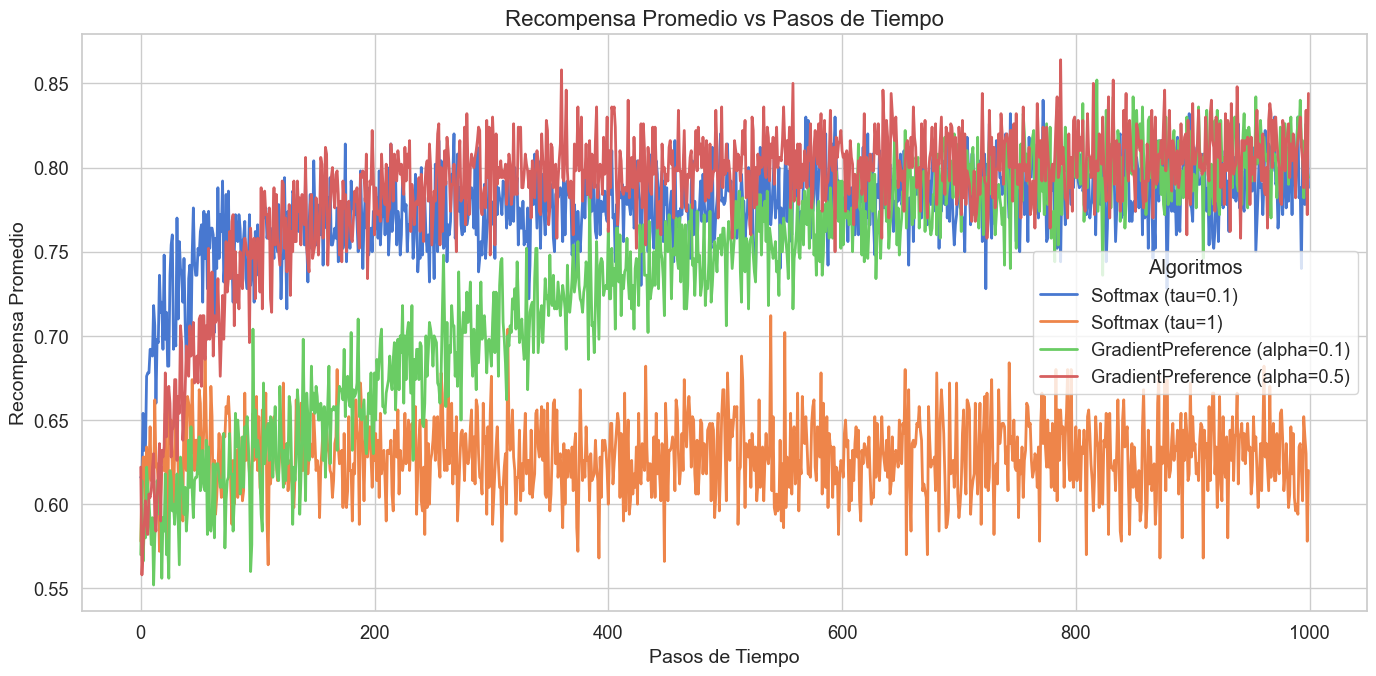

In [8]:
# Graficar los resultados
plot_average_rewards(steps, rewards, algorithms)

**Análisis de la Recompensa Promedio en Función del Tiempo**

**Descripción de los Algoritmos y Configuraciones:**

- **Softmax (τ = 0.1) - Azul**: Baja exploración, favorece la explotación temprana.
- **Softmax (τ = 1) - Naranja**: Mayor exploración, lo que permite evaluar más opciones antes de explotar.
- **Gradiente de Preferencias (α = 0.1) - Verde**: Tasa de aprendizaje baja, lo que permite un ajuste gradual y estable de las preferencias.
- **Gradiente de Preferencias (α = 0.5) - Rojo**: Tasa de aprendizaje alta, lo que permite una adaptación rápida pero puede llevar a convergencia prematura en una política subóptima.

**Análisis de Resultados**

1. **Crecimiento y Convergencia de la Recompensa Promedio**

- **Softmax (τ = 0.1) - Azul**: Inicialmente, su recompensa promedio crece de manera estable y alcanza un buen rendimiento. Sin embargo, su baja exploración podría impedir que encuentre la mejor opción global.
  
- **Softmax (τ = 1) - Naranja**: Al permitir mayor exploración, este algoritmo tiene un desempeño inferior en términos de recompensa promedio. Muestra fluctuaciones notables, lo que sugiere que la alta exploración impide la explotación efectiva de los mejores brazos.

- **Gradiente de Preferencias (α = 0.1) - Verde**: Este algoritmo obtiene una recompensa promedio alta. Su menor tasa de aprendizaje permite una convergencia más estable y efectiva hacia los brazos óptimos. Muestra un crecimiento constante y alcanza una recompensa promedio estable. Su tasa de aprendizaje baja evita cambios bruscos y permite un ajuste progresivo, asegurando una buena explotación.

- **Gradiente de Preferencias (α = 0.5) - Rojo**: Con una tasa de aprendizaje alta, este algoritmo converge más rápido y alcanza una recompensa promedio alta. Su mayor tasa de aprendizaje ajusta las preferencias rápidamente, lo que permite identificar y explotar el brazo óptimo de manera eficiente. Es el algoritmo que logra la mejor recompensa promedio final. Gracias a su alta tasa de aprendizaje, converge rápidamente hacia las opciones más óptimas, mostrando una tendencia estable en el tiempo.

2. **Equilibrio entre Exploración y Explotación**

- **Gradiente de Preferencias** ajusta dinámicamente las probabilidades de selección de los brazos, lo que resulta en un mejor desempeño en términos de recompensa promedio.Además demuestra el mejor balance entre exploración y explotación, permitiendo alcanzar un alto rendimiento en menos tiempo.
- **Softmax** utiliza una estrategia de exploración controlada por temperatura (τ), pero su rendimiento es inferior al de Gradiente de Preferencias en este experimento. Ya que Softmax (τ = 1) evidencia los efectos de una exploración excesiva, ya que su recompensa promedio es baja y fluctuante, y Softmax (τ = 0.1) y Gradiente de Preferencias (α = 0.1) son estrategias más conservadoras, con un crecimiento estable pero más lento.

**Conclusiones**

- El mejor desempeño se obtuvo con Gradiente de Preferencias (α = 0.5), que alcanzó la mayor recompensa promedio con rápida convergencia.
- Softmax (τ = 1) mostró el peor desempeño debido a su alta exploración, que impidió una explotación eficiente.
- Softmax (τ = 0.1) logró una recompensa decente, pero su falta de exploración podría hacer que no siempre encuentre la mejor opción.
- Gradiente de Preferencias (α = 0.1) fue estable, aunque más lento en alcanzar su mejor recompensa.
- Para maximizar la recompensa a largo plazo, es crucial encontrar un buen balance entre exploración y explotación.


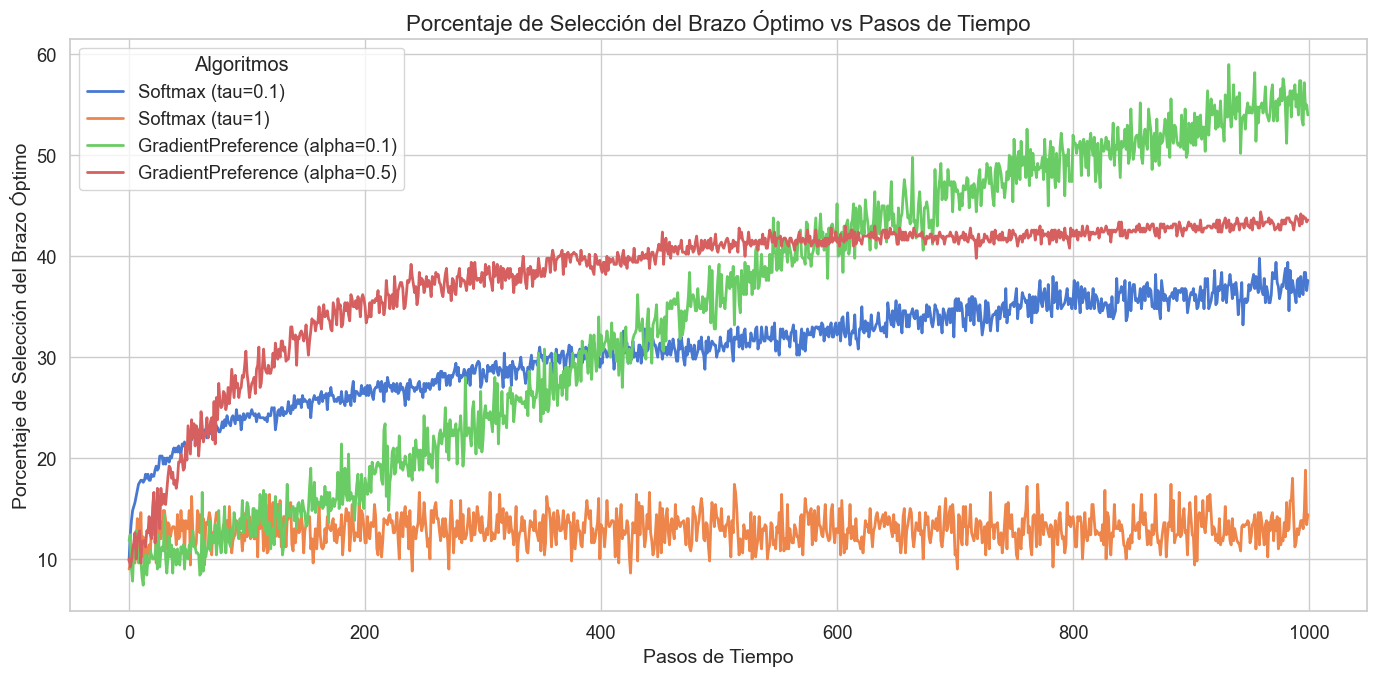

In [9]:
plot_optimal_selections(steps, optimal_selections, algorithms)

**Explicación de los Resultados de la Gráfica de Porcentajes de Selección de los Brazos Óptimos**

La gráfica de porcentajes de selección de los brazos óptimos muestra cómo cada algoritmo explora y explota los brazos del bandido a lo largo del tiempo. A continuación, se detallan los resultados observados para los cuatro algoritmos probados:

1. **Softmax (τ = 0.1) - Línea Azul**:
    - Este algoritmo tiene una temperatura baja, lo que significa que favorece la explotación sobre la exploración.
    - La línea azul muestra un crecimiento gradual en el porcentaje de selección del brazo óptimo, indicando que el algoritmo explora menos y se enfoca más en los brazos que inicialmente parecen prometedores.
    - A largo plazo, el algoritmo logra identificar el brazo óptimo, pero lo hace de manera más lenta en comparación con otros algoritmos con mayor exploración.

2. **Softmax (τ = 1) - Línea Naranja**:
    - Con una temperatura más alta, este algoritmo permite una mayor exploración.
        - La línea naranja muestra un crecimiento más rápido en el porcentaje de selección del brazo óptimo en comparación con τ = 0.1 debido a su mayor exploración.
        - Sin embargo, esta exploración excesiva también lleva a seleccionar brazos subóptimos con mayor frecuencia, lo que resulta en un peor rendimiento general en términos de recompensa promedio.

3. **Gradiente de Preferencias (α = 0.1) - Línea Verde**:
    - Este algoritmo tiene una tasa de aprendizaje baja, lo que significa que ajusta sus preferencias de manera más lenta.
    - La línea verde muestra un crecimiento moderado en el porcentaje de selección del brazo óptimo.
    - Aunque el algoritmo eventualmente converge hacia el brazo óptimo, lo hace a un ritmo más lento debido a la menor tasa de aprendizaje.

4. **Gradiente de Preferencias (α = 0.5) - Línea Roja**:
    - Con una tasa de aprendizaje alta, este algoritmo ajusta sus preferencias rápidamente.
    - La línea roja muestra un crecimiento rápido y consistente en el porcentaje de selección del brazo óptimo.
    - Este algoritmo es el más eficiente en identificar y explotar el brazo óptimo, alcanzando un alto porcentaje de selección en menos tiempo.

**Conclusiones**

- **Exploración vs Explotación**: Los algoritmos con mayor exploración (Softmax con τ = 1 y Gradiente de Preferencias con α = 0.5) identifican el brazo óptimo más rápidamente. Sin embargo, una exploración excesiva puede llevar a seleccionar brazos subóptimos en las primeras etapas.
- **Tasa de Aprendizaje**: Un mayor valor de α en el Gradiente de Preferencias permite un ajuste más rápido y eficiente, resultando en una identificación más rápida del brazo óptimo.
- **Temperatura en Softmax**: Una temperatura más alta (τ = 1) permite una mejor exploración inicial, pero una temperatura demasiado baja (τ = 0.1) puede llevar a una explotación prematura y subóptima.

Podemos concluir que el Gradiente de Preferencias con α = 0.5 es el algoritmo más efectivo para identificar y explotar el brazo óptimo rápidamente, seguido por Softmax con τ = 1. Los algoritmos con menor exploración o tasa de aprendizaje (Softmax con τ = 0.1 y Gradiente de Preferencias con α = 0.1) tardan más en converger hacia el brazo óptimo.